# introduction

In this project, I analyze data on "Resale flat prices based on registration date from Jan 2017 onwards," sourced from data.gov.sg. For the scope of this analysis, I focus on resale flat prices from 2020 to 2024 to identify investment opportunities in Singapore’s real estate market.

Using Python and key data analysis libraries such as Pandas, Matplotlib, and Seaborn, I conduct an in-depth analysis to determine the best resale flat investment options. This project demonstrates my ability to clean, visualize, and interpret data to derive actionable insights in a real-world context.

By the end of this analysis, you will know the best options for town, flat type, room size, floor, commencement date, and price range to invest in Singapore.

data source: https://data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view?dataExplorerPage=1

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
import seaborn as sns

In [3]:
#import dataframe Resale flat prices based on registration date from Jan-2017 onward (Mar-2025)
df = pd.read_csv(r'C:\Users\1\Desktop\Nut\Data_Analyst\Python_Project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv', skiprows=0)

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
#data cleaning and prepare calculate data
df['resale_price'] = pd.to_numeric(df['resale_price'], errors='coerce')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['month'].dt.year
df['price_sqm'] = df['resale_price'] / df['floor_area_sqm'] 

# Function to convert 'years months' to total months
def convert_to_months(lease):
    # Initialize years and months as 0
    years = 0
    months = 0
    
    # If 'years' is found in the string
    if 'year' in lease:
        years = int(lease.split('year')[0].strip())  # Extract years
        
    # If 'months' is found in the string
    if 'month' in lease:
        months = int(lease.split('month')[0].split()[-1].strip())  # Extract months
    
    # Calculate total months (years * 12 + months)
    return (years * 12) + months

# Apply the conversion function to 'remaining_lease'
df['remaining_lease_months'] = df['remaining_lease'].apply(convert_to_months)
df['price_sqm'] = df['price_sqm'] / df['remaining_lease_months'] 
df_unique = df.drop_duplicates().dropna(subset=['resale_price'])

print('Length of original df       :', len(df))
print('Length of drop duplicates df:', len(df_unique))
print('Rows Dropped                :', len(df)-len(df_unique))


Length of original df       : 202109
Length of drop duplicates df: 201811
Rows Dropped                : 298


In [6]:
df_unique.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,7.164032,736
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,5.132522,727
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,5.220892,749
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,5.230951,745
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,5.280673,749


In [7]:
#min and max of Resale Registered date and Lease commence
resale_min = df_unique['year'].min()
resale_max = df_unique['year'].max()
print('Resale Registered date year Range:',resale_min, '-' ,resale_max)

commence_min = df_unique['lease_commence_date'].min()
commence_max = df_unique['lease_commence_date'].max()
print('Lease commence year Range:',commence_min, '-' ,commence_max)

Resale Registered date year Range: 2017 - 2025
Lease commence year Range: 1966 - 2021


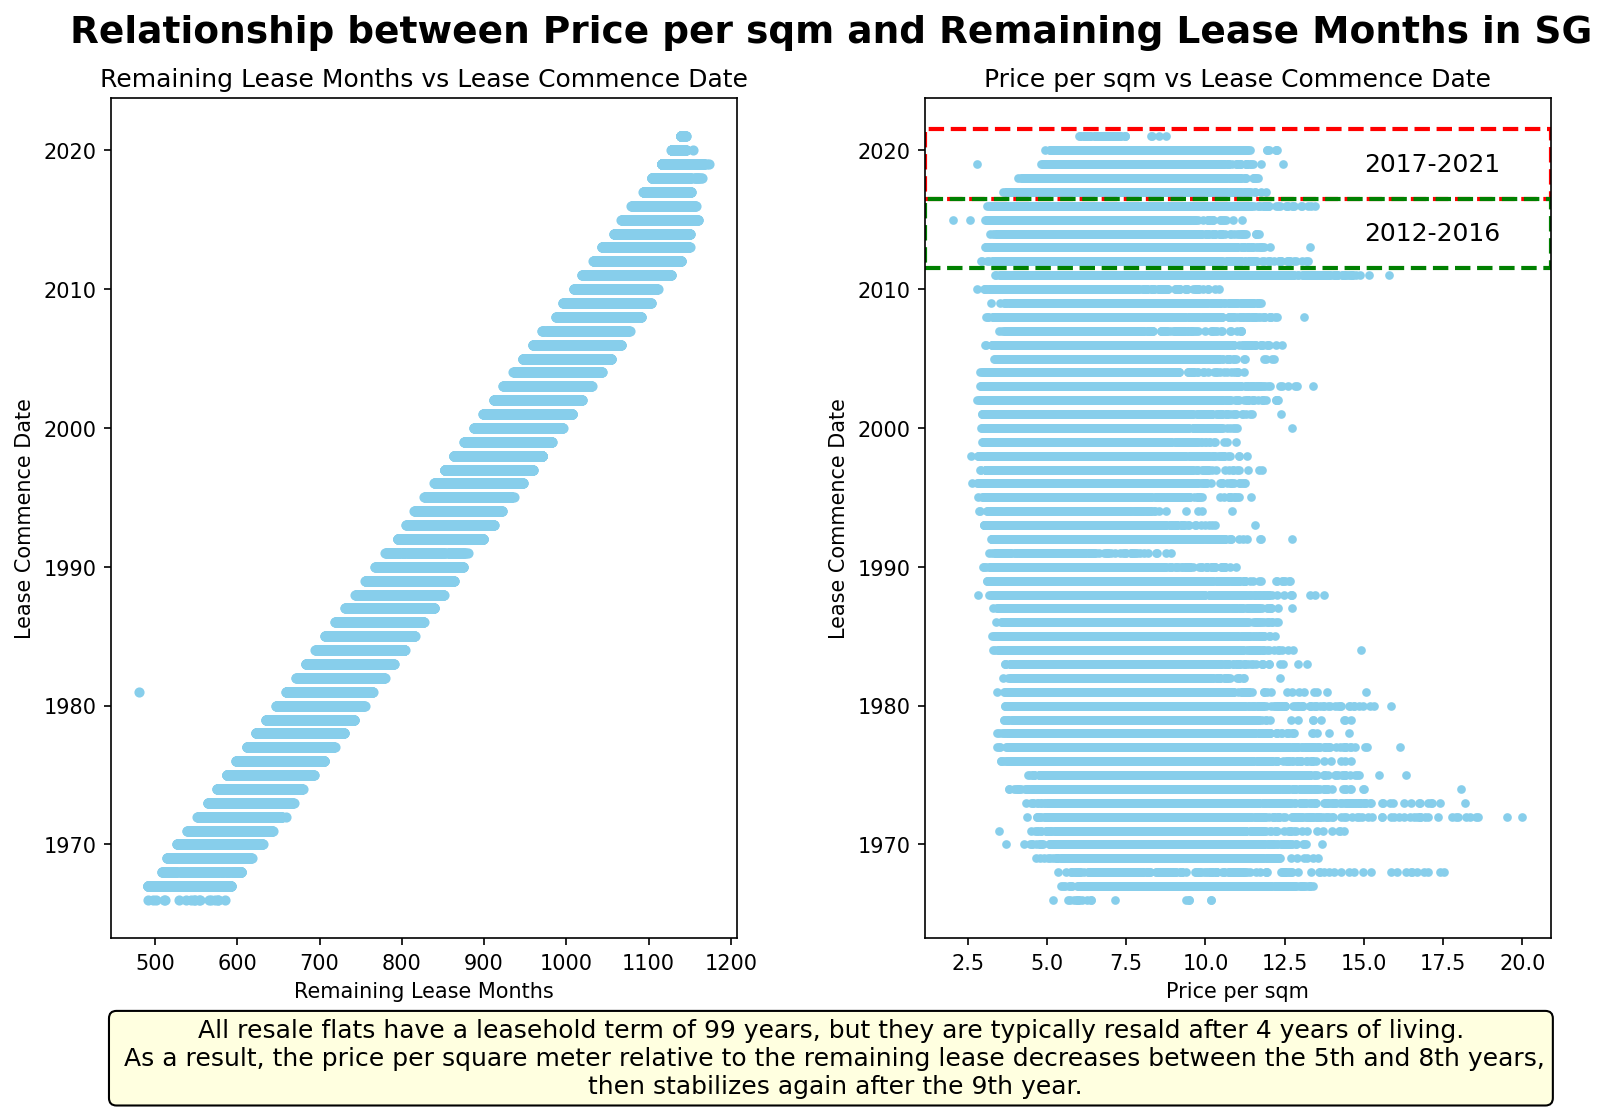

In [8]:
#Relationship between Price per sqm and Remaining Lease Months in SG

fig, axes = plt.subplots(1, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

df_overview = df_unique.copy()

# Remaining Lease Months vs Lease Commence Date
ax = axes[0]
ax.scatter(df_overview['remaining_lease_months'], df_overview['lease_commence_date'], color='skyblue', s=15)
ax.set_title('Remaining Lease Months vs Lease Commence Date')
ax.set_xlabel('Remaining Lease Months')
ax.set_ylabel('Lease Commence Date')

#----------------------------------------------------------------------------------------------------------------------

# Price per sqm vs Lease Commence Date
ax = axes[1]
ax.scatter(df_overview['price_sqm'], df_overview['lease_commence_date'], color='skyblue', s=10)
ax.set_title('Price per sqm vs Lease Commence Date')
ax.set_xlabel('Price per sqm')
ax.set_ylabel('Lease Commence Date')
# Check the y-axis range for lease commence date
y_min, y_max = ax.get_ylim()  # Get the current y-axis limits

# Define the range for lease commence date (between 2017 and 2021)
y1_start = 2016.5
y1_end = 2021.5

# Ensure that the years 2015 to 2020 are within the y-range
if y_min <= y1_start <= y_max and y_min <= y1_end <= y_max:
    # Get the x-axis range for the plot
    x_min, x_max = ax.get_xlim()  # Get the current x-axis limits
    
    # Add a red box from 2015 to 2020 in the y-axis and covering the entire x-axis
    ax.add_patch(Rectangle((x_min, y1_start), x_max - x_min, y1_end - y1_start,
                           linewidth=2, edgecolor='red', facecolor='none', linestyle='--'))
    ax.text(15, (y1_start + y1_end) / 2,
            '2017-2021', ha='left', va='center', fontsize=12, color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
    
# Define the range for lease commence date (between 2011 and 2016)
y2_start = 2011.5
y2_end = 2016.5

# Ensure that the years 2015 to 2020 are within the y-range
if y_min <= y2_start <= y_max and y_min <= y2_end <= y_max:
    # Get the x-axis range for the plot
    x_min, x_max = ax.get_xlim()  # Get the current x-axis limits
    
    # Add a red box from 2015 to 2020 in the y-axis and covering the entire x-axis
    ax.add_patch(Rectangle((x_min, y2_start), x_max - x_min, y2_end - y2_start,
                           linewidth=2, edgecolor='Green', facecolor='none', linestyle='--'))
    ax.text(15, (y2_start + y2_end) / 2,
            '2012-2016', ha='left', va='center', fontsize=12, color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9, hspace=0.6, wspace=0.3)

fig.suptitle("Relationship between Price per sqm and Remaining Lease Months in SG", fontsize=18, fontweight='bold', y=0.92)

fig.text(0.5, 0.05, 
         'All resale flats have a leasehold term of 99 years, but they are typically resald after 4 years of living.\n As a result, the price per square meter relative to the remaining lease decreases between the 5th and 8th years,\n then stabilizes again after the 9th year.', 
         ha='center', va='center', fontsize=12, color='black',
         bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

I narrow down Resale Registered date to 2020-2024 because 2025 have only 3 month of data and I want data to be up to date within 5 year

I also narrow down Lease commence year Range to 2012-2016 where price per sqm per lease remain is stable and good for investment

In [9]:
#Data resale during this 5 year and lease_commence_date between 2012 and 2016
resalefrom2020to2024 = [2020, 2021, 2022, 2023, 2024]
df_main = df_unique.copy()
df_main = df_unique[(df_unique['year'].isin(resalefrom2020to2024)) & (df_unique['lease_commence_date'] >= 2012) & (df_unique['lease_commence_date'] <= 2016)]

print('Length of df_unique                                                             :', len(df_unique))
print('Length of drop select 2020-2024 and lease_commence_date between 2012 and 2016 df:', len(df_main))
print('Rows Dropped                                                                    :', len(df_unique)-len(df_main))

Length of df_unique                                                             : 201811
Length of drop select 2020-2024 and lease_commence_date between 2012 and 2016 df: 22413
Rows Dropped                                                                    : 179398


In [10]:
df_main.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
64257,2020-01-01,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,19 TO 21,70.0,Model A,2012,91 years 08 months,470000.0,2020,6.103896,1100
64299,2020-01-01,ANG MO KIO,3 ROOM,650,ANG MO KIO ST 61,19 TO 21,67.0,Model A,2015,94 years 11 months,458888.0,2020,6.013235,1139
64300,2020-01-01,ANG MO KIO,3 ROOM,650,ANG MO KIO ST 61,10 TO 12,67.0,Model A,2015,94 years 11 months,423000.0,2020,5.542961,1139
64302,2020-01-01,ANG MO KIO,4 ROOM,307A,ANG MO KIO AVE 1,16 TO 18,97.0,Model A,2012,91 years 08 months,715000.0,2020,6.701031,1100
64303,2020-01-01,ANG MO KIO,4 ROOM,310B,ANG MO KIO AVE 1,13 TO 15,94.0,Model A,2012,91 years 08 months,660000.0,2020,6.382979,1100


In [11]:
#Prepare Data
df_town = df_main.copy()
print('Length of df_main:', len(df_main))
print('Length of df_town:', len(df_town))
print('Rows Dropped     :', len(df_main)-len(df_town))


Length of df_main: 22413
Length of df_town: 22413
Rows Dropped     : 0


In [12]:
df_town.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
64257,2020-01-01,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,19 TO 21,70.0,Model A,2012,91 years 08 months,470000.0,2020,6.103896,1100
64299,2020-01-01,ANG MO KIO,3 ROOM,650,ANG MO KIO ST 61,19 TO 21,67.0,Model A,2015,94 years 11 months,458888.0,2020,6.013235,1139
64300,2020-01-01,ANG MO KIO,3 ROOM,650,ANG MO KIO ST 61,10 TO 12,67.0,Model A,2015,94 years 11 months,423000.0,2020,5.542961,1139
64302,2020-01-01,ANG MO KIO,4 ROOM,307A,ANG MO KIO AVE 1,16 TO 18,97.0,Model A,2012,91 years 08 months,715000.0,2020,6.701031,1100
64303,2020-01-01,ANG MO KIO,4 ROOM,310B,ANG MO KIO AVE 1,13 TO 15,94.0,Model A,2012,91 years 08 months,660000.0,2020,6.382979,1100


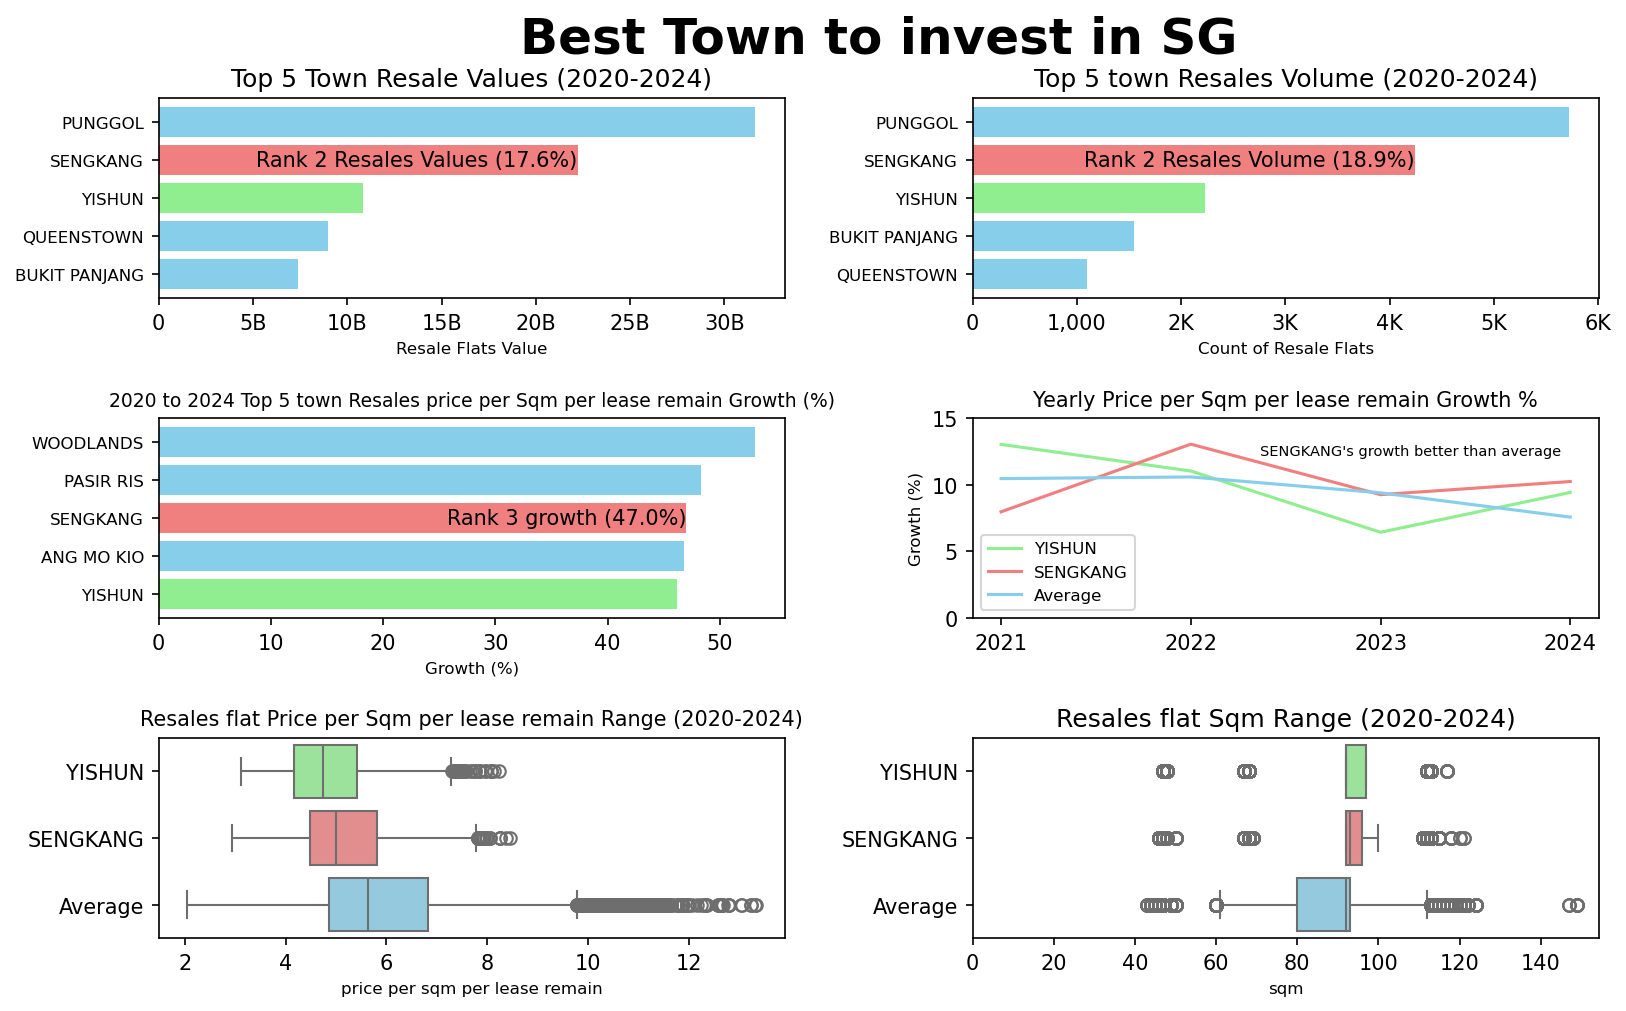

In [13]:
#Best Town to invest in SG
fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

# Customizing the x-axis formatting
def custom_xaxis_format(x, pos):
    if x >= 1000000:
        return f'{int(x / 100000000):,}B'  # For values >= 1,000,000, show 'B'
    if x >= 1000000:
        return f'{x / 1000000:,}M'  # For values >= 1,000,000, show 'M'
    if x >= 2000:
        return f'{int(x / 1000):,}K'  # For values >= 1000, show 'K'
    else:
        return f'{int(x):,}'  # For values < 1000, show normally

#------------------------------------------------------------------------------------------------------------------------

# Top 5 town Resales Values (2020-2024)
df_grouped_town = df_town.groupby('town')['resale_price'].sum().reset_index() 
top_5_town_value = df_grouped_town.sort_values(by='resale_price', ascending=False).head(5)['town'].tolist()
total_resale_price = df_grouped_town['resale_price'].sum() 
df_grouped_town['percentage'] = (df_grouped_town['resale_price'] / total_resale_price) * 100 
df_top_5_town = df_grouped_town[df_grouped_town['town'].isin(top_5_town_value)].sort_values(by='resale_price', ascending=False)

highlight_row = df_grouped_town[df_grouped_town['town'] == 'SENGKANG'].iloc[0]
highlight_value = highlight_row['resale_price']
highlight_percentage = highlight_row['percentage']

colors = ['lightcoral' if town == 'SENGKANG'
          else 'lightgreen' if town == 'YISHUN'
          else 'skyblue'
          for town in df_top_5_town['town']]

ax = axes[0]

ax.barh(df_top_5_town['town'], df_top_5_town['resale_price'], color=colors)
ax.set_title('Top 5 Town Resale Values (2020-2024)')
ax.set_xlabel('Resale Flats Value', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()  # Invert y-axis for proper order
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=8)
ax.annotate(f"Rank 2 Resales Values ({highlight_percentage:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 1),
            fontsize=10, color='black', ha='right', va='center')

#-------------------------------------------------------------------------------------------------------------

# Top 5 town Resales Volume (2020-2024)
df_grouped_town = df_town.groupby('town').size().reset_index(name='count') 
top_5_town_volume = df_grouped_town.sort_values(by='count', ascending=False).head(5)['town'].tolist()
total_count = df_grouped_town['count'].sum() 
df_grouped_town['percentage'] = (df_grouped_town['count'] / total_count) * 100 
df_top_5_town = df_grouped_town[df_grouped_town['town'].isin(top_5_town_volume)].sort_values(by='count', ascending=False)

highlight_row = df_grouped_town[df_grouped_town['town'] == 'SENGKANG'].iloc[0]
highlight_value = highlight_row['count']
highlight_percentage = highlight_row['percentage']

colors = ['lightcoral' if town == 'SENGKANG'
          else 'lightgreen' if town == 'YISHUN'
          else 'skyblue'
          for town in df_top_5_town['town']]

ax = axes[1]
ax.barh(df_top_5_town ['town'], df_top_5_town ['count'], color=colors)
ax.set_title('Top 5 town Resales Volume (2020-2024)')
ax.set_xlabel('Count of Resale Flats',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=8)
ax.annotate(f"Rank 2 Resales Volume ({highlight_percentage:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 1),
            fontsize=10, color='black', ha='right', va='center')

#----------------------------------------------------------------------------------------------------------------------

# 2020 to 2024 Top 5 town Resales price per Sqm per lease remain Growth (%)
y2020_y2024 = [2020, 2024]
df_filtered = df_town[df_town['year'].isin(y2020_y2024)]
pivot_y20_vs_y24 = df_filtered.pivot_table(index='year', columns='town', values='price_sqm', aggfunc='median')
growth_y20_vs_y24 = pivot_y20_vs_y24.pct_change(axis=0, fill_method=None) * 100
growth_y20_vs_y24 = growth_y20_vs_y24.drop(index=2020, axis=0).transpose().sort_values(2024, ascending=False).reset_index().head(5)
df_top_5_town = growth_y20_vs_y24.copy()
top_5_town_growth_y20_vs_y24 = growth_y20_vs_y24['town'].tolist()

highlight_row = growth_y20_vs_y24[growth_y20_vs_y24['town'] == 'SENGKANG'].iloc[0]
highlight_value = highlight_row[2024]

colors = ['lightcoral' if town == 'SENGKANG'
          else 'lightgreen' if town == 'YISHUN'
          else 'skyblue'
          for town in df_top_5_town['town']]

ax = axes[2]
ax.barh(df_top_5_town['town'], df_top_5_town[2024], color=colors)
ax.set_title('2020 to 2024 Top 5 town Resales price per Sqm per lease remain Growth (%)',fontsize=9)
ax.set_xlabel('Growth (%)',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=8)
ax.annotate(f"Rank 3 growth ({highlight_value:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 2),
            fontsize=10, color='black', ha='right', va='center')

#----------------------------------------------------------------------------------------------------------------------

# Plot the 4 Room price per sqm percentage growth from 2020 to 2024 (5 years)
highlight_town = df_town[df_town['town'].isin(top_5_town_volume) & df_town['town'].isin(top_5_town_value) & df_town['town'].isin(top_5_town_growth_y20_vs_y24)]['town'].unique().tolist()
df_filtered = df_town.copy()
df_filtered['town'] = df_filtered['town'].apply(lambda x: x if x in highlight_town else 'Average')

pivot_growth_df = df_filtered.pivot_table(index='year', columns='town', values='price_sqm', aggfunc='median')
growth_yearly_df = pivot_growth_df.pct_change(axis=0, fill_method=None) * 100
growth_yearly_df = growth_yearly_df.dropna()
growth_yearly_df = growth_yearly_df[sorted(growth_yearly_df.columns, reverse=True)]

ax = axes[3]

color_map = {'SENGKANG': 'lightcoral','YISHUN': 'lightgreen'}

for town in growth_yearly_df.columns:
    colors = color_map.get(town,'skyblue')
    ax.plot(growth_yearly_df.index, growth_yearly_df[town], label=town, color=colors)
ax.set_title('Yearly Price per Sqm per lease remain Growth %', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Growth (%)',fontsize=8)
ax.set_ylim(0,15)
ax.set_xticks(growth_yearly_df.index)
ax.legend(loc='lower left', fontsize=8)
ax.text(0.7, 0.8,
        'SENGKANG\'s growth better than average',
        fontsize=7, color='black', ha='center', va='bottom',
        transform=ax.transAxes)

#----------------------------------------------------------------------------------------------------------------------

# Resales flat Price per Sqm per lease remain Range (2020-2024)

df_filtered = df_town.copy()
df_filtered['town'] = df_filtered['town'].apply(lambda x: x if x in highlight_town else 'Average')

ax = axes[4]

colors = ['skyblue','lightcoral','lightgreen']
sns.boxplot(x='price_sqm', y='town', data=df_filtered, ax=ax, orient='h', palette=colors, hue='town')
ax.set_title('Resales flat Price per Sqm per lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('price per sqm per lease remain',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

#----------------------------------------------------------------------------------------------------------------------

# Resales flat Sqm Range (2020-2024)

df_filtered = df_town.copy()
df_filtered['town'] = df_filtered['town'].apply(lambda x: x if x in highlight_town else 'Average')

ax = axes[5]

colors = ['skyblue','lightcoral','lightgreen']
sns.boxplot(x='floor_area_sqm', y='town', data=df_filtered, ax=ax, orient='h', palette=colors, hue='town')
ax.set_title('Resales flat Sqm Range (2020-2024)')
ax.set_xlabel('sqm',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.set_xlim(0, )
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9, hspace=0.6, wspace=0.3)

fig.suptitle("Best Town to invest in SG", fontsize=24, fontweight='bold', y=0.92)

plt.show()

Sengkang is the second most popular town in Singapore for resale flats. It has experienced significant growth in resale prices, with a 47% increase and an average annual growth of around 10%. The price range is slightly lower than the average, while the room sizes are larger than typical flats.

Here is addition information from ChatGPT

Sengkang Town in Singapore is an attractive option for investing in resale flats due to its excellent connectivity, including MRT and LRT links, and proximity to key developments like the North-South Corridor. With a growing population, family-friendly amenities, and ongoing infrastructure improvements, Sengkang is becoming increasingly popular for both residents and investors. The area offers more affordable prices compared to central locations, with strong potential for capital appreciation as it matures. Additionally, the town has a vibrant community, a strong rental market, and long-term development prospects, making it a solid choice for property investment.

In [14]:
#Prepare Data by filtered Town = SENGKANG
df_flat = df_main.copy()
df_flat = df_flat[df_flat['town'] == 'SENGKANG']
print('Length of df_town                                 :', len(df_town))
print('Length of df_flat (df_town select town = SENGKANG):', len(df_flat))
print('Rows Dropped                                      :', len(df_town)-len(df_flat))

Length of df_town                                 : 22413
Length of df_flat (df_town select town = SENGKANG): 4245
Rows Dropped                                      : 18168


In [15]:
df_flat.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
65468,2020-01-01,SENGKANG,2 ROOM,453A,FERNVALE RD,07 TO 09,46.0,Model A,2015,94 years 06 months,232000.0,2020,4.447512,1134
65469,2020-01-01,SENGKANG,2 ROOM,448B,SENGKANG WEST WAY,22 TO 24,46.0,2-room,2014,93 years 06 months,227000.0,2020,4.398202,1122
65470,2020-01-01,SENGKANG,2 ROOM,450C,SENGKANG WEST WAY,16 TO 18,46.0,Model A,2014,93 years 06 months,238000.0,2020,4.611331,1122
65471,2020-01-01,SENGKANG,3 ROOM,334C,ANCHORVALE CRES,01 TO 03,67.0,Premium Apartment,2015,95 years,322000.0,2020,4.215763,1140
65472,2020-01-01,SENGKANG,3 ROOM,334C,ANCHORVALE CRES,07 TO 09,67.0,Premium Apartment,2015,94 years 11 months,352000.0,2020,4.612582,1139


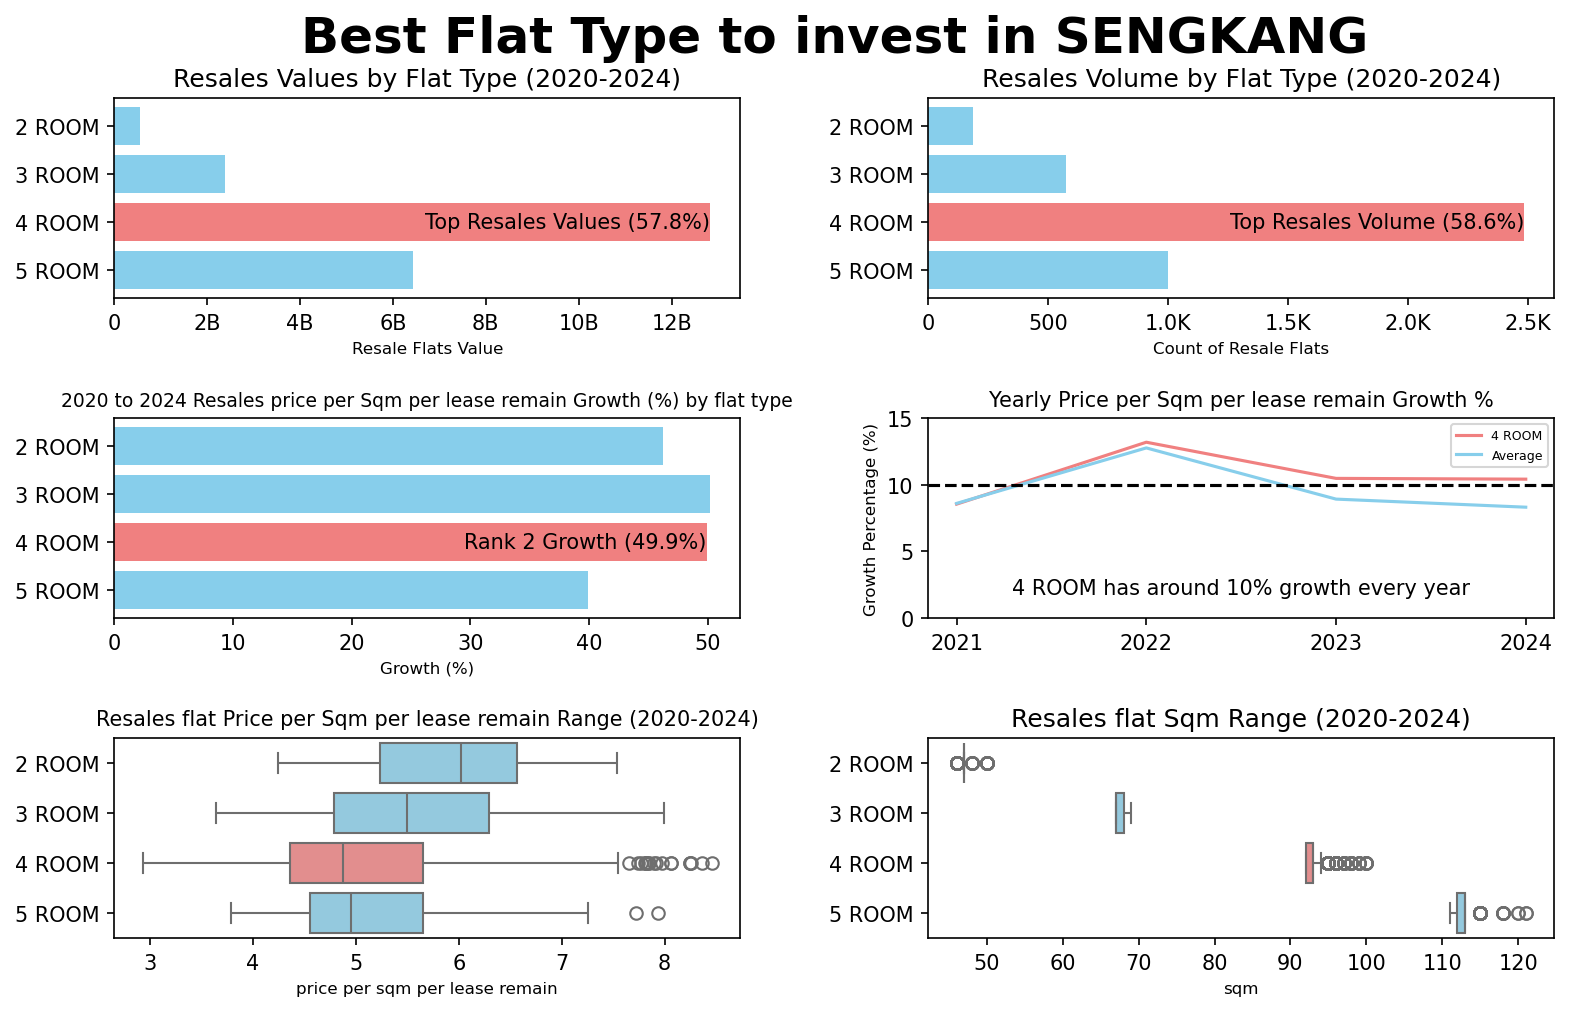

In [16]:
#Best Flat Type to invest in SENGKANG
fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

# Customizing the x-axis formatting
def custom_xaxis_format(x, pos):
    if x >= 1000000:
        return f'{int(x / 100000000):,}B'  # For values >= 1,000,000, show 'B'
    if x >= 1000000:
        return f'{x / 1000000:,}M'  # For values >= 1,000,000, show 'M'
    if x >= 1000:
        return f'{x / 1000:,}K'  # For values >= 1000, show 'K'
    else:
        return f'{int(x):,}'  # For values < 1000, show normally

#------------------------------------------------------------------------------------------------------------------------

# Resales Values by Flat Type (2020-2024)
df_2024_group_flat = df_flat.groupby('flat_type')['resale_price'].sum().reset_index()
total_resale_price = df_2024_group_flat['resale_price'].sum()
df_2024_group_flat['percentage'] = (df_2024_group_flat['resale_price'] / total_resale_price) * 100
max_resale_price_idx = df_2024_group_flat['resale_price'].idxmax()
highlight_flat = df_2024_group_flat.loc[max_resale_price_idx, 'flat_type']

highlight_row = df_2024_group_flat[df_2024_group_flat['flat_type'] == highlight_flat].iloc[0]
highlight_value = highlight_row['resale_price']
highlight_percentage = highlight_row['percentage']
highlight_idx = df_2024_group_flat[df_2024_group_flat['flat_type'] == highlight_flat].index[0]

colors = ['lightcoral' if flat_type == highlight_flat else 'skyblue' 
          for flat_type in df_2024_group_flat['flat_type']]

ax = axes[0]
ax.barh(df_2024_group_flat['flat_type'], df_2024_group_flat['resale_price'], color=colors)
ax.set_title('Resales Values by Flat Type (2020-2024)')
ax.set_xlabel('Resale Flats Value', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.annotate(f"Top Resales Values ({highlight_percentage:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#-------------------------------------------------------------------------------------------------------------------------------------------

# Resales Volume by Flat Type (2020-2024)
df_2024_group_flat = df_flat.groupby('flat_type').size().reset_index(name='count')
total_count = df_2024_group_flat['count'].sum()
df_2024_group_flat['percentage'] = (df_2024_group_flat['count'] / total_count) * 100
max_count_idx = df_2024_group_flat['count'].idxmax()
highlight_flat = df_2024_group_flat.loc[max_count_idx, 'flat_type']

highlight_row = df_2024_group_flat[df_2024_group_flat['flat_type'] == highlight_flat].iloc[0]
highlight_value = highlight_row['count']
highlight_percentage = highlight_row['percentage']
highlight_idx = df_2024_group_flat[df_2024_group_flat['flat_type'] == highlight_flat].index[0]

colors = ['lightcoral' if flat_type == highlight_flat else 'skyblue' 
          for flat_type in df_2024_group_flat['flat_type']]

ax = axes[1]
ax.barh(df_2024_group_flat['flat_type'], df_2024_group_flat['count'], color=colors)
ax.set_title('Resales Volume by Flat Type (2020-2024)')
ax.set_xlabel('Count of Resale Flats', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.annotate(f"Top Resales Volume ({highlight_percentage:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#-----------------------------------------------------------------------------------------------------------------

# 2020 to 2024 Resales price per Sqm per lease remain Growth (%) by flat type
y2020_y2024 = [2020, 2024]
df_filtered = df_flat[df_flat['year'].isin(y2020_y2024)]
pivot_y20_vs_y24 = df_filtered.pivot_table(index='year', columns='flat_type', values='price_sqm', aggfunc='median')
growth_y20_vs_y24 = pivot_y20_vs_y24.pct_change(axis=0, fill_method=None) * 100
growth_y20_vs_y24 = growth_y20_vs_y24.drop(index=2020, axis=0).transpose()

highlight_row = growth_y20_vs_y24[growth_y20_vs_y24.index == '4 ROOM'].iloc[0]
highlight_value = highlight_row[2024]
highlight_idx = growth_y20_vs_y24[growth_y20_vs_y24.index == '4 ROOM'].index[0]

colors = ['lightcoral' if flat_type == '4 ROOM' else 'skyblue' 
          for flat_type in growth_y20_vs_y24.index]

ax = axes[2]
ax.barh(growth_y20_vs_y24.index, growth_y20_vs_y24[2024], color=colors)
ax.set_title('2020 to 2024 Resales price per Sqm per lease remain Growth (%) by flat type',fontsize=9)
ax.set_xlabel('Growth (%)',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.annotate(f"Rank 2 Growth ({highlight_value:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#----------------------------------------------------------------------------------------------------------------------

# Yearly Price per Sqm per lease remain Growth %

df_filtered = df_flat.copy()
df_filtered['flat_type'] = df_filtered['flat_type'].apply(lambda x: x if x in highlight_flat else 'Average')
pivot_growth_df = df_filtered.pivot_table(index='year', columns='flat_type', values='price_sqm', aggfunc='median')
growth_yearly_df = pivot_growth_df.pct_change(axis=0, fill_method=None) * 100
growth_yearly_df = growth_yearly_df.drop(index=2020, axis=0)

color_map = {'4 ROOM': 'lightcoral'}

ax = axes[3]

for flat_type in growth_yearly_df.columns:
    colors = color_map.get(flat_type,'skyblue')
    ax.plot(growth_yearly_df.index, growth_yearly_df[flat_type], label=flat_type, color=colors)

ax.set_title('Yearly Price per Sqm per lease remain Growth %', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Growth Percentage (%)', fontsize=8)
ax.set_ylim(0,15)
ax.set_xticks(growth_yearly_df.index)
ax.legend(loc='upper right', fontsize=6)
ax.axhline(y=10, color='black', linestyle='--')
ax.text(0.5, 0.1,
        '4 ROOM has around 10% growth every year',
        fontsize=10, color='black', ha='center', va='bottom',
        transform=ax.transAxes)

#------------------------------------------------------------------------------------------------------------------------

# Resales flat Price per Sqm per lease remain Range (2020-2024)

df_filtered = df_flat.copy()
colors = ['skyblue', 'skyblue', 'lightcoral', 'skyblue']

ax = axes[4]
sns.boxplot(x='price_sqm', y='flat_type', data=df_filtered, ax=ax, orient='h', palette=colors, hue='flat_type')
ax.set_title('Resales flat Price per Sqm per lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('price per sqm per lease remain',fontsize=8)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

#----------------------------------------------------------------------------------------------------------------------

# Resales flat Sqm Range (2020-2024)

df_filtered = df_flat.copy()
colors = ['skyblue', 'skyblue', 'lightcoral', 'skyblue']

ax = axes[5]
sns.boxplot(x='floor_area_sqm', y='flat_type', data=df_filtered, ax=ax, orient='h', palette=colors, hue='flat_type')
ax.set_title('Resales flat Sqm Range (2020-2024)')
ax.set_xlabel('sqm',fontsize=8)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9, hspace=0.6, wspace=0.3)

fig.suptitle('Best Flat Type to invest in SENGKANG', fontsize=24, fontweight='bold', y=0.92)

plt.show()

4-room flats are the most popular in Sengkang for resale. They have experienced the second-highest growth in resale prices, with a 49.9% increase over the past 5 years, averaging an annual increase of around 10%. Their price range is slightly lower than the average.

In [17]:
#Prepare Data by filtered Town = SENGKANG, flat_type = 4 Room
df_sqm = df_main.copy()
df_sqm['floor_area_sqm'] = df_sqm['floor_area_sqm'].astype(int).astype(str)
df_sqm = df_sqm[(df_sqm['town'] == 'SENGKANG') & (df_sqm['flat_type'] == '4 ROOM')]
print('Length of df_flat                                   :', len(df_flat))
print('Length of df_sqm (df_flat select flat_type = 4 ROOM):', len(df_sqm))
print('Rows Dropped                                        :', len(df_flat)-len(df_sqm))


Length of df_flat                                   : 4245
Length of df_sqm (df_flat select flat_type = 4 ROOM): 2486
Rows Dropped                                        : 1759


In [18]:
df_sqm.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
65485,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,10 TO 12,92,Premium Apartment,2015,94 years 11 months,475000.0,2020,4.532962,1139
65486,2020-01-01,SENGKANG,4 ROOM,335C,ANCHORVALE CRES,07 TO 09,92,Premium Apartment,2015,95 years,460000.0,2020,4.385965,1140
65487,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,13 TO 15,92,Premium Apartment,2015,94 years 11 months,486000.0,2020,4.637936,1139
65488,2020-01-01,SENGKANG,4 ROOM,336D,ANCHORVALE CRES,10 TO 12,92,Premium Apartment,2015,94 years 11 months,470000.0,2020,4.485246,1139
65489,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,16 TO 18,92,Premium Apartment,2015,94 years 11 months,470000.0,2020,4.485246,1139


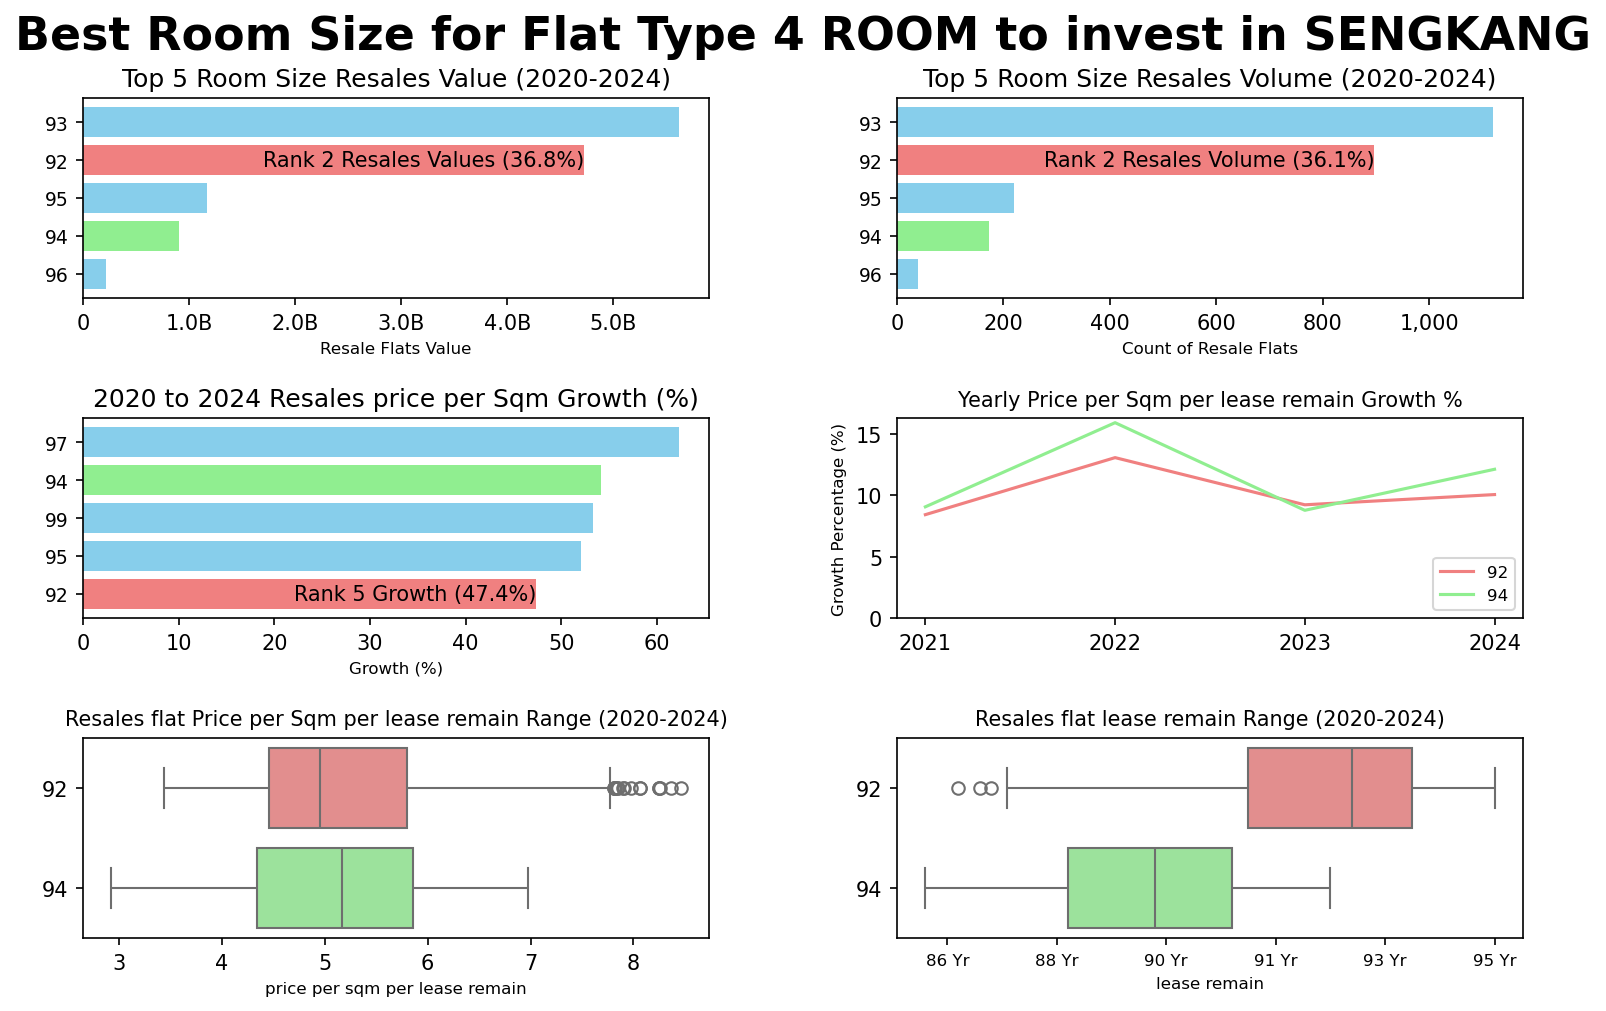

In [19]:
# Best Room Size for Flat Type 4 ROOM to invest in SENGKANG
fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

def custom_xaxis_format(x, pos):
    if x >= 1000000:
        return f'{x / 100000000:,}B'
    if x >= 1000000:
        return f'{x / 1000000:,}M'
    if x >= 2000:
        return f'{int(x / 1000):,}K'
    else:
        return f'{int(x):,}'
    
#--------------------------------------------------------------------------------------------------------

# Top 5 Room Size Resales Value (2020-2024)
df_grouped_sqm = df_sqm.groupby('floor_area_sqm')['resale_price'].sum().reset_index()
top_5_sqm_value = df_grouped_sqm.sort_values(by='resale_price', ascending=False).head(5)['floor_area_sqm'].tolist()
total_resale_price = df_grouped_sqm['resale_price'].sum()
df_grouped_sqm['percentage'] = (df_grouped_sqm['resale_price'] / total_resale_price) * 100
df_top_5_sqm = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'].isin(top_5_sqm_value)].sort_values(by='resale_price', ascending=False)

highlight_row = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'] == '92'].iloc[0]
highlight_value = highlight_row['resale_price']
highlight_percentage = highlight_row['percentage']
highlight_idx = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'] == '92'].index[0]

colors = ['lightcoral' if floor_area_sqm == '92'
          else 'lightgreen' if floor_area_sqm == '94'
          else 'skyblue' for floor_area_sqm in df_top_5_sqm['floor_area_sqm']]

ax = axes[0]
ax.barh(df_top_5_sqm['floor_area_sqm'], df_top_5_sqm ['resale_price'], color=colors)
ax.set_title('Top 5 Room Size Resales Value (2020-2024)')
ax.set_xlabel('Resale Flats Value', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 2 Resales Values ({highlight_percentage:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#--------------------------------------------------------------------------------------------------------

# Top 5 Room Size Resales Volume (2020-2024)
df_grouped_sqm = df_sqm.groupby('floor_area_sqm').size().reset_index(name='count')
top_5_sqm_volume = df_grouped_sqm.sort_values(by='count', ascending=False).head(5)['floor_area_sqm'].tolist()
total_count = df_grouped_sqm['count'].sum()
df_grouped_sqm['percentage'] = (df_grouped_sqm['count'] / total_count) * 100
df_top_5_sqm = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'].isin(top_5_sqm_volume)].sort_values(by='count', ascending=False)

highlight_row = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'] == '92'].iloc[0]
highlight_value = highlight_row['count']
highlight_percentage = highlight_row['percentage']
highlight_idx = df_grouped_sqm[df_grouped_sqm['floor_area_sqm'] == '92'].index[0]

colors = ['lightcoral' if floor_area_sqm == '92'
          else 'lightgreen' if floor_area_sqm == '94'
          else 'skyblue' for floor_area_sqm in df_top_5_sqm['floor_area_sqm']]

ax = axes[1]
ax.barh(df_top_5_sqm['floor_area_sqm'], df_top_5_sqm ['count'], color=colors)
ax.set_title('Top 5 Room Size Resales Volume (2020-2024)')
ax.set_xlabel('Count of Resale Flats', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 2 Resales Volume ({highlight_percentage:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#--------------------------------------------------------------------------------------------------------

# Plot the overall price per sqm percentage growth from 2020 to 2024 (5 years)
y2020_y2024 = [2020, 2024]
df_filtered = df_sqm[df_sqm['year'].isin(y2020_y2024)]
pivot_y20_vs_y24 = df_filtered.pivot_table(index='year', columns='floor_area_sqm', values='price_sqm', aggfunc='median')
growth_y20_vs_y24 = pivot_y20_vs_y24.pct_change(axis=0, fill_method=None) * 100
growth_y20_vs_y24 = growth_y20_vs_y24.drop(index=2020, axis=0).transpose().sort_values(by = 2024, ascending=False).reset_index().head(5)
df_top_5_sqm = growth_y20_vs_y24.copy()
top_5_sqm_growth_y20_vs_y24 = growth_y20_vs_y24['floor_area_sqm'].tolist()

highlight_row = growth_y20_vs_y24[growth_y20_vs_y24['floor_area_sqm'] == '92'].iloc[0]
highlight_value = highlight_row[2024]
highlight_idx = growth_y20_vs_y24[growth_y20_vs_y24['floor_area_sqm'] == '92'].index[0]

colors = ['lightcoral' if floor_area_sqm == '92'
          else 'lightgreen' if floor_area_sqm == '94'
          else 'skyblue' for floor_area_sqm in df_top_5_sqm['floor_area_sqm']]

ax = axes[2]
ax.barh(df_top_5_sqm['floor_area_sqm'], df_top_5_sqm[2024], color=colors)
ax.set_title('2020 to 2024 Resales price per Sqm Growth (%)')
ax.set_xlabel('Growth (%)',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 5 Growth ({highlight_value:.1f}%)", 
            xy=(highlight_value, highlight_idx),
            xytext=(highlight_value, highlight_idx),
            fontsize=10, color='black', ha='right', va='center')

#----------------------------------------------------------------------------------------------------------------------

# Yearly Price per Sqm per lease remain Growth %
from2019to2024 = [2019, 2020, 2021, 2022, 2023, 2024]

highlight_sqm = df_sqm[df_sqm['floor_area_sqm'].isin(top_5_sqm_volume) & df_sqm['floor_area_sqm'].isin(top_5_sqm_value) & df_sqm['floor_area_sqm'].isin(top_5_sqm_growth_y20_vs_y24) ]['floor_area_sqm'].unique().tolist()
df_filtered = df_sqm[df_sqm['year'].isin(from2019to2024)]
df_filtered = df_filtered.copy()
df_filtered['floor_area_sqm'] = df_filtered['floor_area_sqm'].apply(lambda x: x if x in highlight_sqm else 'Average')
df_filtered = df_filtered[df_filtered['floor_area_sqm'].isin(['92','94'])]

pivot_growth_df = df_filtered.pivot_table(index='year', columns='floor_area_sqm', values='price_sqm', aggfunc='median')
growth_yearly_df = pivot_growth_df.pct_change(axis=0, fill_method=None) * 100
growth_yearly_df = growth_yearly_df.dropna()

ax = axes[3]

color_map = {'92': 'lightcoral', '94': 'lightgreen'}

for floor_area_sqm in growth_yearly_df.columns:
    colors = color_map.get(floor_area_sqm,'skyblue')
    ax.plot(growth_yearly_df.index, growth_yearly_df[floor_area_sqm], label=floor_area_sqm, color=colors)
ax.set_title('Yearly Price per Sqm per lease remain Growth %', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Growth Percentage (%)', fontsize=8)
ax.set_ylim(0,)
ax.legend(loc='lower right', fontsize=8)
ax.set_xticks(growth_yearly_df.index)

#----------------------------------------------------------------------------------------------------------------------

# Resales flat Price per Sqm per lease remain Range (2020-2024)

df_filtered = df_sqm.copy()
df_filtered = df_filtered[df_filtered['floor_area_sqm'].isin(['92', '94'])]
colors = ['lightcoral', 'lightgreen']

ax = axes[4]
sns.boxplot(x='price_sqm', y='floor_area_sqm', data=df_filtered, ax=ax, orient='h', palette=colors, hue='floor_area_sqm')
ax.set_title('Resales flat Price per Sqm per lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('price per sqm per lease remain',fontsize=8)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

#----------------------------------------------------------------------------------------------------------------------

# Resales flat lease remain Range (2020-2024)

df_filtered = df_sqm.copy()
df_filtered = df_filtered[df_filtered['floor_area_sqm'].isin(['92', '94'])]
colors = ['lightcoral', 'lightgreen']

ax = axes[5]
sns.boxplot(x='remaining_lease_months', y='floor_area_sqm', data=df_filtered, ax=ax, orient='h', palette=colors, hue='floor_area_sqm')
ax.set_title('Resales flat lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('lease remain',fontsize=8)
ax.set_ylabel('')

def format_years(x, pos):
    years = int(x // 12) 
    return f'{years} Yr'

ax.xaxis.set_major_formatter(FuncFormatter(format_years))
ax.tick_params(axis='x', labelsize=8)

#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9, hspace=0.6, wspace=0.3)

fig.suptitle("Best Room Size for Flat Type 4 ROOM to invest in SENGKANG", fontsize=22, fontweight='bold', y=0.92)

plt.show()

The 92 sqm 4-room flat is considered a 'starter' size for many families or young couples. It offers a comfortable living space without being too large or expensive, especially in a growing area like Sengkang. It has experienced notable growth in resale prices, with a 47.4% increase over the past five years. This consistent appreciation in value, at an annual rate of about 9%, suggests that these flats have been a reliable investment.

I chose the 92 sqm flat over the 94 sqm one because the 92 sqm unit has higher demand

In [20]:
#Prepare Data by filtered Town = SENGKANG, flat_type = 4 Room, floor_area_sqm = 92
df_storey = df_main.copy()
df_storey = df_storey[(df_storey['town'] == 'SENGKANG') & (df_storey['flat_type'] == '4 ROOM') & (df_storey['floor_area_sqm'] == 92)]
print('Length of df_sqm                                        :', len(df_sqm))
print('Length of df_storey (df_flat select floor_area_sqm = 92):', len(df_storey))
print('Rows Dropped                                            :', len(df_sqm)-len(df_storey))


Length of df_sqm                                        : 2486
Length of df_storey (df_flat select floor_area_sqm = 92): 897
Rows Dropped                                            : 1589


In [21]:
df_storey.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
65485,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,10 TO 12,92.0,Premium Apartment,2015,94 years 11 months,475000.0,2020,4.532962,1139
65486,2020-01-01,SENGKANG,4 ROOM,335C,ANCHORVALE CRES,07 TO 09,92.0,Premium Apartment,2015,95 years,460000.0,2020,4.385965,1140
65487,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,13 TO 15,92.0,Premium Apartment,2015,94 years 11 months,486000.0,2020,4.637936,1139
65488,2020-01-01,SENGKANG,4 ROOM,336D,ANCHORVALE CRES,10 TO 12,92.0,Premium Apartment,2015,94 years 11 months,470000.0,2020,4.485246,1139
65489,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,16 TO 18,92.0,Premium Apartment,2015,94 years 11 months,470000.0,2020,4.485246,1139


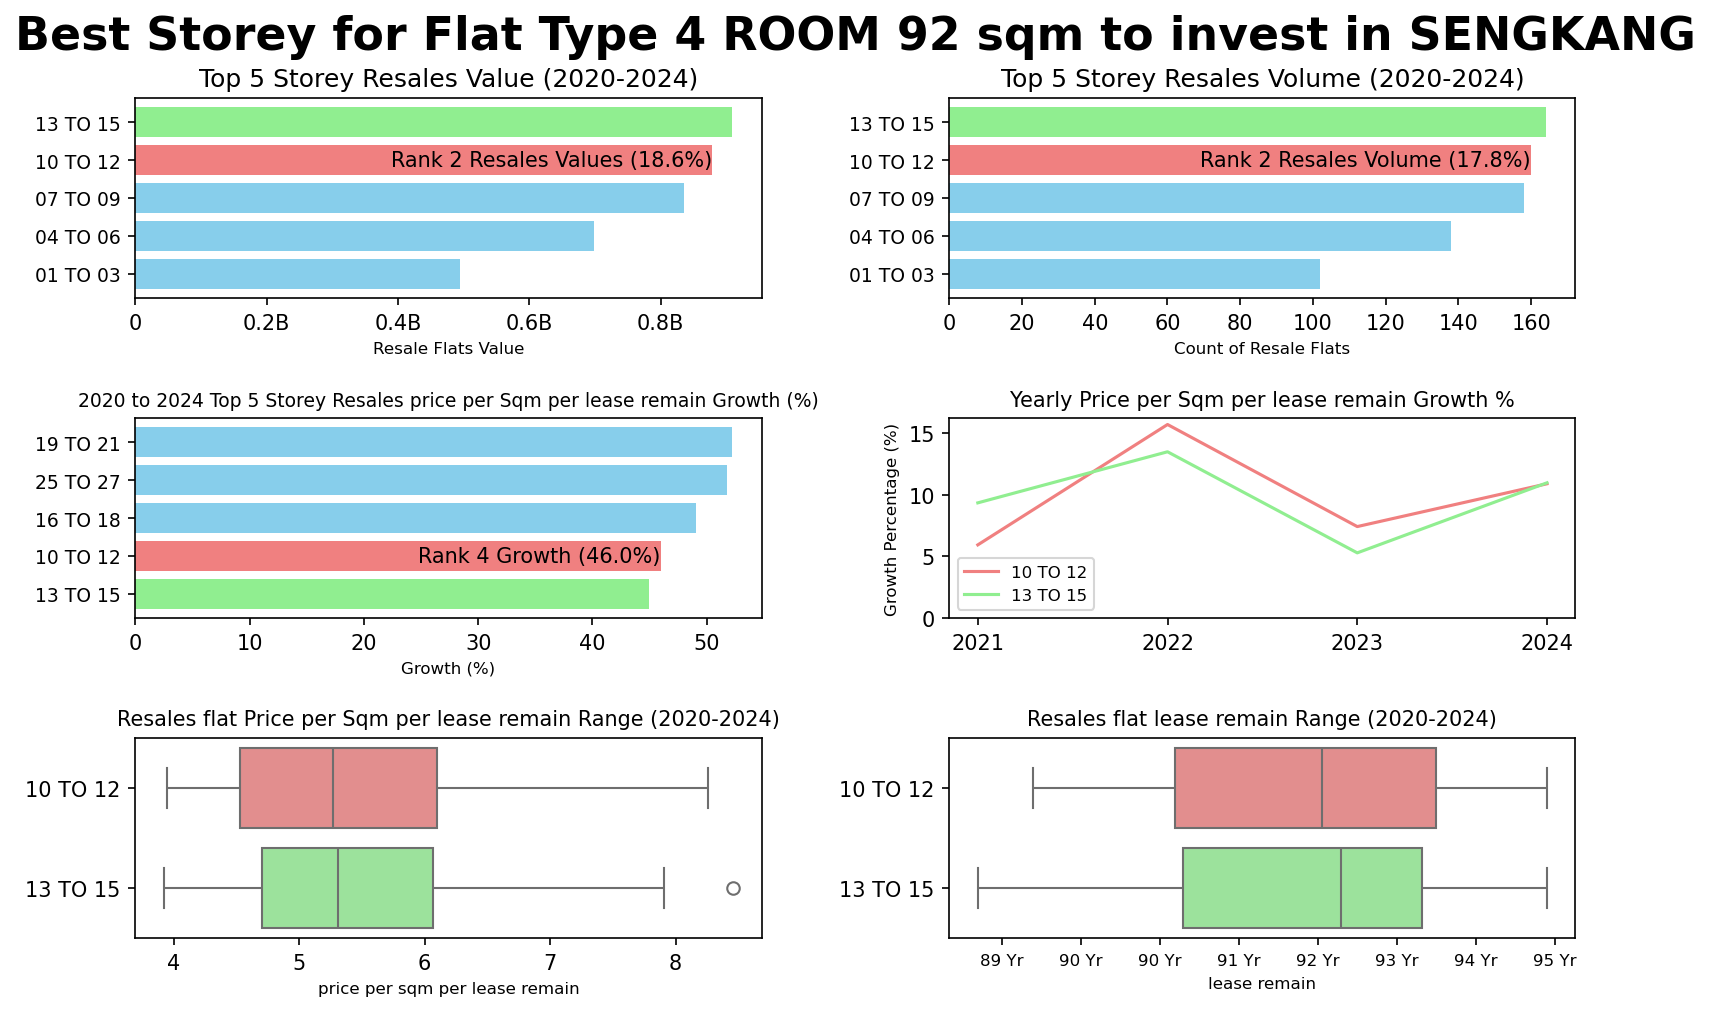

In [22]:
# Best Storey for Flat Type 4 ROOM 92 sqm to invest in SENGKANG
fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

def custom_xaxis_format(x, pos):
    if x >= 1000000:
        return f'{x / 100000000:,}B'
    if x >= 1000000:
        return f'{x / 1000000:,}M'
    if x >= 2000:
        return f'{x / 1000:,}K'
    else:
        return f'{int(x):,}'
    
#--------------------------------------------------------------------------------------------------------

# Top 5 Storey Resales Value (2020-2024)
df_grouped_storey = df_storey.groupby('storey_range')['resale_price'].sum().reset_index()
top_5_storey_value = df_grouped_storey.sort_values(by='resale_price', ascending=False).head(5)['storey_range'].tolist()
total_resale_price = df_grouped_storey['resale_price'].sum()
df_grouped_storey['percentage'] = (df_grouped_storey['resale_price'] / total_resale_price) * 100
df_top_5_storey = df_grouped_storey[df_grouped_storey['storey_range'].isin(top_5_storey_value)].sort_values(by='resale_price', ascending=False)

highlight_row = df_top_5_storey[df_top_5_storey['storey_range'] == '10 TO 12'].iloc[0]
highlight_value = highlight_row['resale_price']
highlight_percentage = highlight_row['percentage']

colors = ['lightcoral' if storey_range == '10 TO 12'
          else 'lightgreen' if storey_range == '13 TO 15'
          else 'skyblue' for storey_range in df_top_5_storey['storey_range']]

ax = axes[0]
ax.barh(df_top_5_storey['storey_range'], df_top_5_storey ['resale_price'], color=colors)
ax.set_title('Top 5 Storey Resales Value (2020-2024)')
ax.set_xlabel('Resale Flats Value', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 2 Resales Values ({highlight_percentage:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 1),
            fontsize=10, color='black', ha='right', va='center')

#--------------------------------------------------------------------------------------------------------

# Top 5 Storey Resales Volume (2020-2024)
df_grouped_storey = df_storey.groupby('storey_range').size().reset_index(name='count')
top_5_storey_volume = df_grouped_storey.sort_values(by='count', ascending=False).head(5)['storey_range'].tolist()
total_count = df_grouped_storey['count'].sum()
df_grouped_storey['percentage'] = (df_grouped_storey['count'] / total_count) * 100
df_top_5_storey = df_grouped_storey[df_grouped_storey['storey_range'].isin(top_5_storey_volume)].sort_values(by='count', ascending=False)

highlight_row = df_top_5_storey[df_top_5_storey['storey_range'] == '10 TO 12'].iloc[0]
highlight_value = highlight_row['count']
highlight_percentage = highlight_row['percentage']

colors = ['lightcoral' if storey_range == '10 TO 12'
          else 'lightgreen' if storey_range == '13 TO 15'
          else 'skyblue' for storey_range in df_top_5_storey['storey_range']]

ax = axes[1]
ax.barh(df_top_5_storey['storey_range'], df_top_5_storey ['count'], color=colors)
ax.set_title('Top 5 Storey Resales Volume (2020-2024)')
ax.set_xlabel('Count of Resale Flats', fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 2 Resales Volume ({highlight_percentage:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 1),
            fontsize=10, color='black', ha='right', va='center')

#--------------------------------------------------------------------------------------------------------

# Plot the overall price per sqm percentage growth from 2020 to 2024 (5 years)
y2020_y2024 = [2020, 2024]
df_filtered = df_storey[df_storey['year'].isin(y2020_y2024)]
pivot_y20_vs_y24 = df_filtered.pivot_table(index='year', columns='storey_range', values='price_sqm', aggfunc='median')
growth_y20_vs_y24 = pivot_y20_vs_y24.pct_change(axis=0, fill_method=None) * 100
growth_y20_vs_y24 = growth_y20_vs_y24.drop(index=2020, axis=0).transpose().sort_values(by = 2024, ascending=False).reset_index().head(5)
df_top_5_storey = growth_y20_vs_y24.copy()
top_5_storey_growth_y20_vs_y24 = growth_y20_vs_y24['storey_range'].tolist()

highlight_row = df_top_5_storey[df_top_5_storey['storey_range'] == '10 TO 12'].iloc[0]
highlight_value = highlight_row[2024]

colors = ['lightcoral' if storey_range == '10 TO 12'
          else 'lightgreen' if storey_range == '13 TO 15'
          else 'skyblue' for storey_range in df_top_5_storey['storey_range']]

ax = axes[2]
ax.barh(df_top_5_storey['storey_range'], df_top_5_storey[2024], color=colors)
ax.set_title('2020 to 2024 Top 5 Storey Resales price per Sqm per lease remain Growth (%)',fontsize=9)
ax.set_xlabel('Growth (%)',fontsize=8)
ax.set_ylabel('')
ax.invert_yaxis()
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.tick_params(axis='y', labelsize=9)
ax.annotate(f"Rank 4 Growth ({highlight_value:.1f}%)", 
            xy=(0, 0),
            xytext=(highlight_value, 3),
            fontsize=10, color='black', ha='right', va='center')

#----------------------------------------------------------------------------------------------------------------------

# Yearly Price per Sqm per lease remain Growth %

highlight_storey = df_storey[df_storey['storey_range'].isin(top_5_storey_volume) & df_storey['storey_range'].isin(top_5_storey_value) & df_storey['storey_range'].isin(top_5_storey_growth_y20_vs_y24) ]['storey_range'].unique().tolist()
df_filtered = df_storey.copy()
df_filtered = df_filtered[df_filtered['storey_range'].isin(highlight_storey)]

pivot_growth_df = df_filtered.pivot_table(index='year', columns='storey_range', values='price_sqm', aggfunc='median')
growth_yearly_df = pivot_growth_df.pct_change(axis=0, fill_method=None) * 100
growth_yearly_df = growth_yearly_df.dropna()

ax = axes[3]

color_map = {'10 TO 12': 'lightcoral', '13 TO 15': 'lightgreen'}

for storey_range in growth_yearly_df.columns:
    colors = color_map.get(storey_range,'skyblue')
    ax.plot(growth_yearly_df.index, growth_yearly_df[storey_range], label=storey_range, color=colors)
ax.set_title('Yearly Price per Sqm per lease remain Growth %', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Growth Percentage (%)', fontsize=8)
ax.set_ylim(0,)
ax.legend(loc='lower left', fontsize=8)
ax.set_xticks(growth_yearly_df.index)


#----------------------------------------------------------------------------------------------------------------------

# Resales flat Price per Sqm per lease remain Range (2020-2024)

df_filtered = df_storey.copy()
df_filtered = df_filtered[df_filtered['storey_range'].isin(highlight_storey)]
colors = ['lightcoral', 'lightgreen']

ax = axes[4]
sns.boxplot(x='price_sqm', y='storey_range', data=df_filtered, ax=ax, orient='h', palette=colors, hue='storey_range')
ax.set_title('Resales flat Price per Sqm per lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('price per sqm per lease remain',fontsize=8)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))


#----------------------------------------------------------------------------------------------------------------------

# Resales flat lease remain Range (2020-2024)

df_filtered = df_storey.copy()
df_filtered = df_filtered[df_filtered['storey_range'].isin(highlight_storey)]
colors = ['lightcoral', 'lightgreen']

ax = axes[5]
sns.boxplot(x='remaining_lease_months', y='storey_range', data=df_filtered, ax=ax, orient='h', palette=colors, hue='storey_range')
ax.set_title('Resales flat lease remain Range (2020-2024)',fontsize=10)
ax.set_xlabel('lease remain',fontsize=8)
ax.set_ylabel('')

def format_years(x, pos):
    years = int(x // 12)
    return f'{years} Yr'

ax.xaxis.set_major_formatter(FuncFormatter(format_years))
ax.tick_params(axis='x', labelsize=8)


#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9, hspace=0.6, wspace=0.3)

fig.suptitle("Best Storey for Flat Type 4 ROOM 92 sqm to invest in SENGKANG", fontsize=22, fontweight='bold', y=0.92)

plt.show()

The second most popular storeys for 92 sqm 4-room flats in Sengkang for resale are between the 10th and 12th floors. These flats have seen the fourth-highest growth in resale prices, with a 46.0% increase over the past 5 years, averaging an annual growth of about 9%. While their price per square meter is slightly lower than that of the 13th to 15th floors, they offer a wider price range, which could potentially lead to a profit. The remaining lease is similar to that of the 13th to 15th floors.

In [23]:
#Prepare Data by filtered Town = SENGKANG, flat_type = 4 Room, floor_area_sqm = 92, storey_range = 10 TO 12
df_final = df_main.copy()
df_final = df_final[(df_final['town'] == 'SENGKANG') & (df_final['flat_type'] == '4 ROOM') & (df_final['floor_area_sqm'] == 92) & (df_final['storey_range'] == '10 TO 12')]
print('Length of df_storey                                          :', len(df_storey))
print('Length of df_final (df_storey select storey_range = 10 TO 12):', len(df_final))
print('Rows Dropped                                                 :', len(df_storey)-len(df_final))

Length of df_storey                                          : 897
Length of df_final (df_storey select storey_range = 10 TO 12): 160
Rows Dropped                                                 : 737


In [24]:
df_final.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,price_sqm,remaining_lease_months
65485,2020-01-01,SENGKANG,4 ROOM,336B,ANCHORVALE CRES,10 TO 12,92.0,Premium Apartment,2015,94 years 11 months,475000.0,2020,4.532962,1139
65488,2020-01-01,SENGKANG,4 ROOM,336D,ANCHORVALE CRES,10 TO 12,92.0,Premium Apartment,2015,94 years 11 months,470000.0,2020,4.485246,1139
65492,2020-01-01,SENGKANG,4 ROOM,326D,ANCHORVALE RD,10 TO 12,92.0,Premium Apartment,2015,94 years 03 months,450000.0,2020,4.324761,1131
65496,2020-01-01,SENGKANG,4 ROOM,326D,ANCHORVALE RD,10 TO 12,92.0,Premium Apartment,2015,94 years 03 months,484000.0,2020,4.651520,1131
65499,2020-01-01,SENGKANG,4 ROOM,329A,ANCHORVALE ST,10 TO 12,92.0,Model A,2015,94 years 07 months,452000.0,2020,4.328673,1135


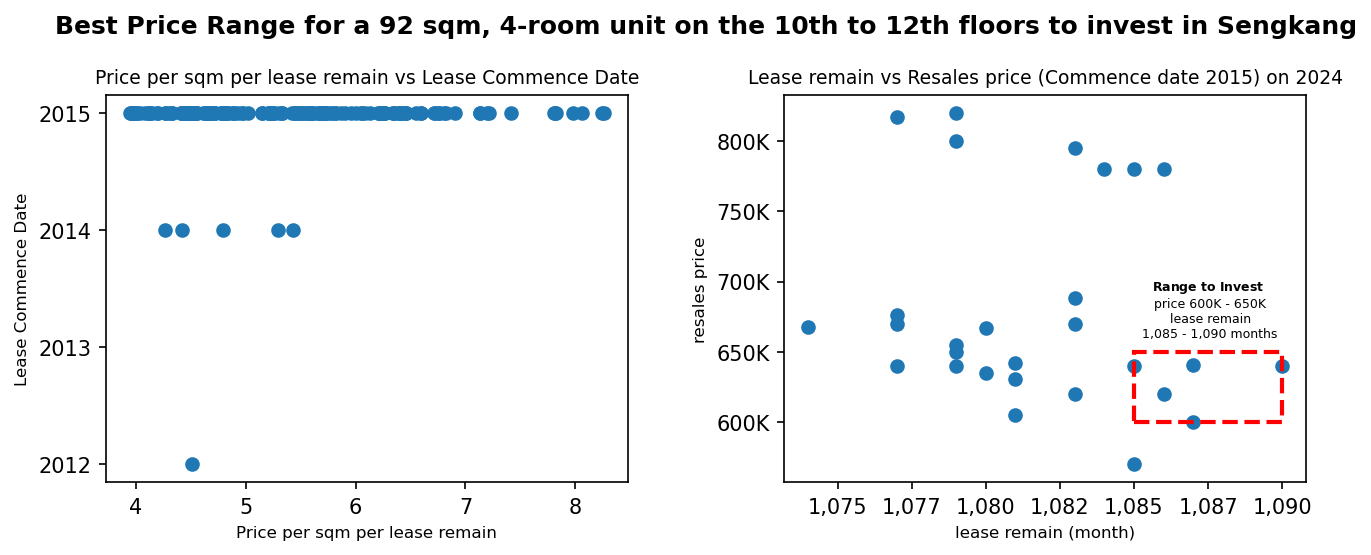

In [25]:
# Best Price Range for a 92 sqm, 4-room unit on the 10th to 12th floors to invest in Sengkang
fig, axes = plt.subplots(1, 2, figsize=(10, 6), dpi=150)
axes = axes.flatten()

# Customizing the x-axis formatting
def custom_xaxis_format(x, pos):
    if x >= 1000000:
        return f'{x / 100000000:,}B'
    if x >= 1000000:
        return f'{x / 1000000:,}M'
    if x >= 2000:
        return f'{int(x / 1000):,}K'
    else:
        return f'{int(x):,}'

ax = axes[0]
ax.scatter(df_final['price_sqm'], df_final['lease_commence_date'])
ax.set_title('Price per sqm per lease remain vs Lease Commence Date',fontsize=9)
ax.set_xlabel('Price per sqm per lease remain', fontsize = 8)
ax.set_ylabel('Lease Commence Date', fontsize = 8)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

#----------------------------------------------------------------------------------------------------------------------

df_filtered = df_final[(df_final['lease_commence_date'] == 2015) & (df_final['year'] == 2024)] # to narrow down to best lease commence date and the most current resales price
ax = axes[1]
ax.scatter(df_filtered['remaining_lease_months'], df_filtered['resale_price'] )
ax.set_title('Lease remain vs Resales price (Commence date 2015) on 2024',fontsize=9)
ax.set_xlabel('lease remain (month)', fontsize = 8)
ax.set_ylabel('resales price', fontsize = 8)
ax.yaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))
ax.xaxis.set_major_formatter(FuncFormatter(custom_xaxis_format))

y_start = 600000
y_end = 650000
x_start = 1085
x_end = df_filtered['remaining_lease_months'].max()

ax.add_patch(Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                           linewidth=2, edgecolor='red', facecolor='none', linestyle='--'))
ax.text((x_start + x_end) / 2, y_end+30000,
            (f'$\\mathbf{{Range\\ to\\ Invest}}$\n price {int(y_start/1000):.0f}K - {int(y_end/1000):.0f}K\n lease remain\n {x_start:,.0f} - {x_end:,.0f} months'), ha='center', va='center', fontsize=6, color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

#----------------------------------------------------------------------------------------------------------------------

plt.tight_layout()

fig.subplots_adjust(top=0.83, bottom=0.4, left=0.1, right=0.9, wspace=0.3)

fig.suptitle("Best Price Range for a 92 sqm, 4-room unit on the 10th to 12th floors to invest in Sengkang", fontsize=12, fontweight='bold', y=0.92)

plt.show()

# Conclusion: 

The best choice for investment in resale flats in Singapore is a 92 sqm, 4-room unit on the 10th to 12th floors in Sengkang, with a lease that commenced in 2015. The price you should aim for is around 600K-650K, with the maximum lease remaining.